**ПРОЕКТ "ТИТАНИК"**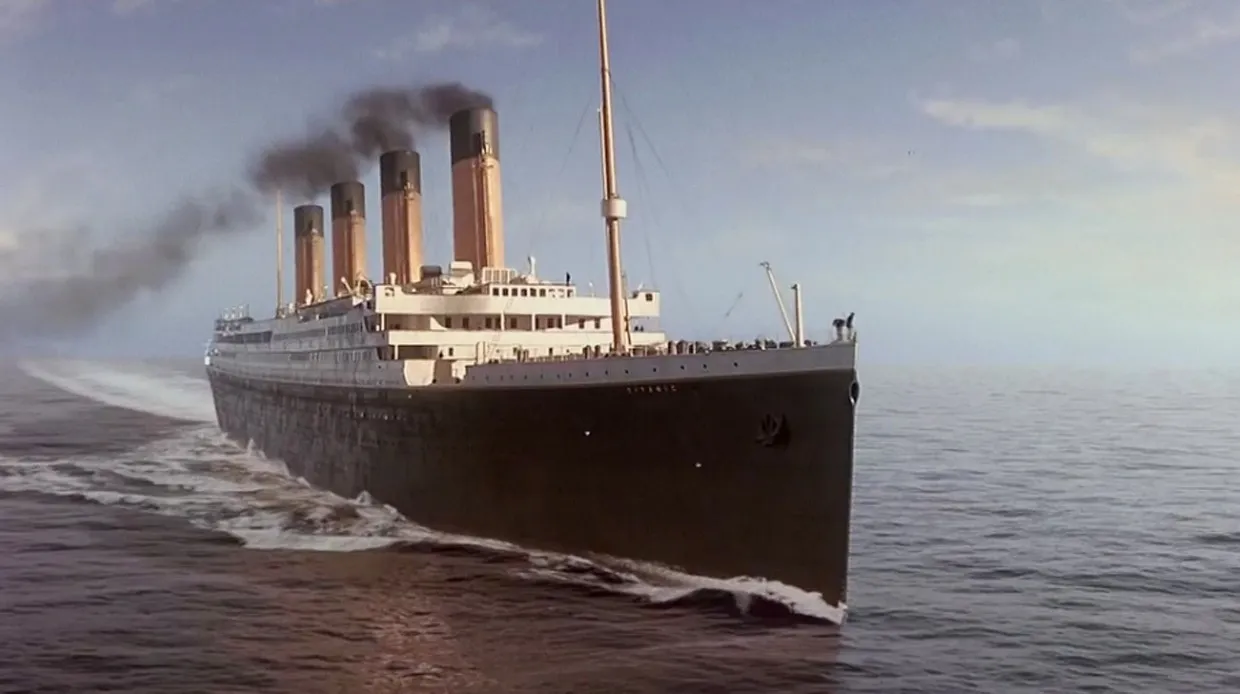

**ЭТАП №1. ОПИСАНИЕ НАБОРА ДАННЫХ.**

В качестве проекта, выносимого на итоговую аттестацию, мной был выбран проект "Титаник" с официального сайта kaggle.com. Причин почему я выбрал именно этот проект несколько: 
1. Сама по себе задача очень интересная и сразу захватила мое внимание;
2. Данный проект стал логичным продолжением обучения, то есть не было сильного разрыва между тем, что я уже знаю и тем, чего еще не знаю.
3. Обилие информации в интернете. В случае затруднений, можно было подглядеть саму идею, как выполнить тот или иной промежуточный этап и переделать под себя, что для самого первого проекта было очень важно.     

На kaggle.com мною были скачаны три датасета, а именно: train.csv, test.csv, gender_submission.csv. 

train.csv - это набор данных состоящий из 12 столбцов и 891 строки. Краткое описание стоблцов:
1. PassengerId - уникальный идентификатор каждого пассажира;
2. Survived - бинарный показатель состоящий из 0 и 1, указывающий погиб пассажир или выжил соответственно;
3. Pclass - идентификатор класса каюты пассажира (1,2,3);
4. Name - содержит имя пассажира и гоноратив;
5. Sex - указывает пол пассажира (male, female);
6. Age - включает в себя возраст пассажира;
7. SibSp - числовой идентификатор количества сиблингов (братьев и сестер) и супругов (spouses);
8. Parch - числовой идентификатор количества родителей (parents) и детей (children);
9. Ticket - номер билета;
10. Fare - стоимость билета;
11. Cabin - номер каюты;
12. Embarked - порт отправления (S=Southampton, C=Cherbourg; Q=Queenstown).

Данный датасет предназначен в первую очередь для того, чтобы на нем можно было обучать алгоритмы машинного обучения, тк в нем содержится самый важный и интересующий нас столбец, а именно: 'Survived'.

test.csv - это набор данных аналогичный train.csv за исключением столбца 'Survived'. Содержит 11 столбцов и 418 строк. Отсутствующий столбец 'Survived' в этом датасете мы и будем предсказывать. 

gender_submission.csv (на сколько я понял) -  это пример того, что мне необходимо будет загрузить на сайт kaggle.com, чтобы принять участие в их соревновании (в работе данный датасет задействован не будет).

**ЭТАП №2. ПРЕДВАРИТЕЛЬНАЯ ОБРАБОТКА ДАННЫХ**

In [ ]:
#Предпросмотр тренировочных данных.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data_train = pd.read_csv('/content/train.csv', decimal='.', delimiter=',') #index_col = 'PassengerId')
data_train 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#Выведем количество заполненных строк.
pd.isnull(data_train)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Выведем количество пропусков в каждом столбце.
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

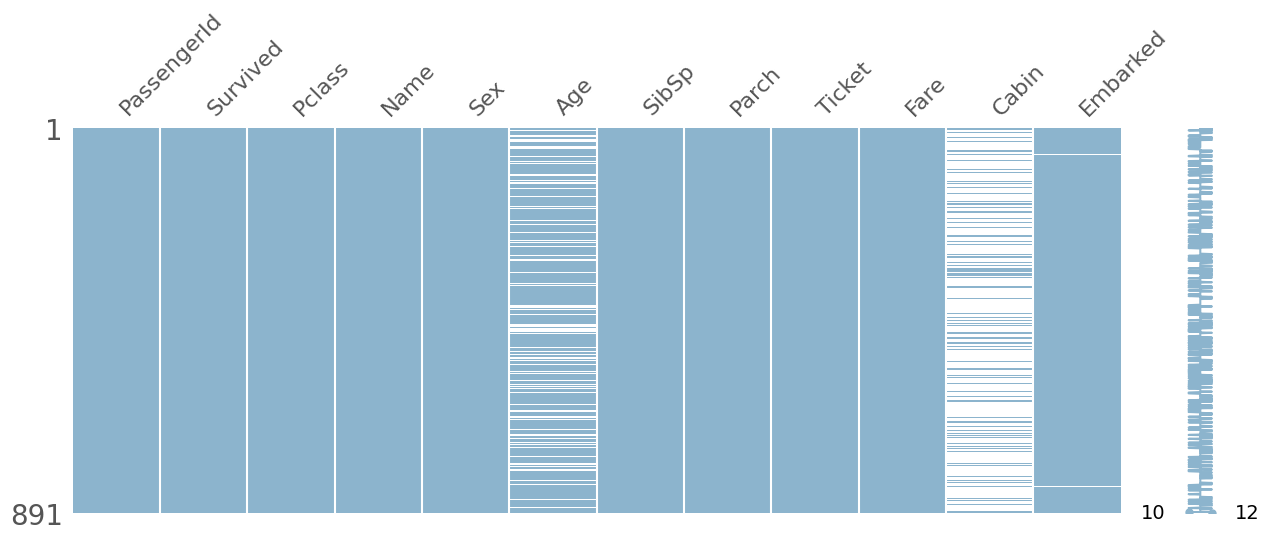

In [ ]:
#Визуализируем пропуски для более наглядного представления.
import missingno as msno

msno.matrix(data_train, figsize=(15,5), color= (140 / 255, 180 / 255, 205 / 255))

Как видно из предварительного анализа, база данных содержит 3 столбца с пропусками, которые необходимо заполнить. Наибольше колличество пропусков находится в столбце, который указывает на номер каюты (Cabin), а наименьшее в столбце, где определен порт отправление(Embarked). Наибольшую озабоченность вызывают пропуски, в которых содержится возраст пассажиров.

In [ ]:
#Подсчитаем количество уникальных значений в каждом столбце.
data_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
#Работа со столбцом "Embarked", где всего 3 возможных значения. Вычисляем их.
data_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
#Доля в процентах значения "S" в столбце Embarked.
round((data_train['Embarked'].str.contains('S').mean()*100),1)

72.4

Большинство пассажиров отправились из порта S. Данное значение является категориальным, соответственно в пропуски можно спокойно ставить S.

In [ ]:
#Заполняем все пропуски в столбце Embarked
data_train['Embarked'].fillna('S', inplace = True)
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Проверка данных. Столбец Embarked заполнен
pd.isnull(data_train)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Конкретные номера кают для каждого пассажира установить невозможно, поэтому ставим 1, где номер каюты известен и 0, где неизвестен. Создаем новый столбец New_Cabin с этими данными и удаляем старый столбец Cabin.

In [ ]:
data_train['New_Cabin'] = np.where(data_train['Cabin'].str.contains("ohc"), 0, 1)
data_train.drop(axis = 1, columns='Cabin', inplace = True)
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,New_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1


In [ ]:
#Проверка данных. Столбец New_Cabin заполнен
pd.isnull(data_train)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  New_Cabin    891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


По идеи можно было бы заполнить пропуски в столбце 'Age' средним значением по столбцу, но такой способ слишком не точный и плохо скажется в конце на обучении модели. На одном из форумов я наткнулся на идею заполнения пропусков на основании указанного в столбце 'Name' гоноратива каждого пассажира.

In [ ]:
#Выявление зависимости возраста от гоноратива. Для начала смотрим какие гоноративы есть в датасете
data_train['Title'] = data_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
data_train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [ ]:
#Cтроим график "ящик с усами", чтобы установить зависимость возраста от гоноратива 
import plotly.express as px
f = px.box(data_frame = data_train, x = 'Title', y = 'Age')
f.show()

На графике связь определенно прослеживается. Например мастер это дети возрастом до 12 лет, а чтобы стать доктором нужно потратить определенное время на обучение, поэтому средний возраст данной категории 46 лет.

In [ ]:
#Заполняем пропуски в столбце 'Age' медианной в соответствии с гоноративом столбца 'Name'.
data_train['Age'].fillna(data_train.groupby('Title')['Age'].transform('median'), inplace=True)
data_train['Age'] = data_train['Age'].astype (int)
data_train.drop(axis = 1, columns='Title', inplace = True)
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,New_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21,1,2,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C,1


In [ ]:
#Проверка данных. Столбец Age заполнен
pd.isnull(data_train)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  New_Cabin    891 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 83.7+ KB


Обратим внимание на столбец "Sex", в котором указан пол пассажира. Данный столбец отображает всего два значения male и female. Когда мы приступим к обучению модели, то это вызовет проблему, поэтому машине лучше всего дать столбец, заполненный бинарными значениями. Представим male как 1, а female как 0.

In [ ]:
#Конвертируем данные о гендере для нового столбца в числовые значения и удалим столбец 'Sex'.
data_train['Gender'] = data_train['Gender'] = data_train.Sex.apply(lambda x: 0 if x == 'female' else 1)
data_train.drop(axis = 1, columns='Sex', inplace = True)
data_train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,New_Cabin,Gender
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27,0,0,211536,13.0000,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19,0,0,112053,30.0000,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",21,1,2,W./C. 6607,23.4500,S,0,0
889,890,1,1,"Behr, Mr. Karl Howell",26,0,0,111369,30.0000,C,1,1


В столбце Fare присутствуют нули. Данный столбец указывает на стоимость билета, соответственно 0 не может являться объективным числом, тк пассажир не мог путешествовать абсолютно бесплатно. Таких нулей не много всего 15 штук, но и не так мало, чтобы можно было пройти мимо, поэтому их нужно чем то заполнить. Очевидно, что есть взаимосвязь между классом каюты пассажира и стомостью билета. 

In [ ]:
#Заменим все нули на среднее значенее в соответствии с классом каюты пассажира.
data_train["Fare"] = data_train["Fare"].replace(0, np.nan)
data_train['Fare'].fillna(data_train.groupby('Pclass')['Fare'].transform('median'), inplace=True)
data_train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,New_Cabin,Gender
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27,0,0,211536,13.0000,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19,0,0,112053,30.0000,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",21,1,2,W./C. 6607,23.4500,S,0,0
889,890,1,1,"Behr, Mr. Karl Howell",26,0,0,111369,30.0000,C,1,1


**ЭТАП №2.1 ВИЗУАЛИЗАЦИЯ ДАННЫХ**

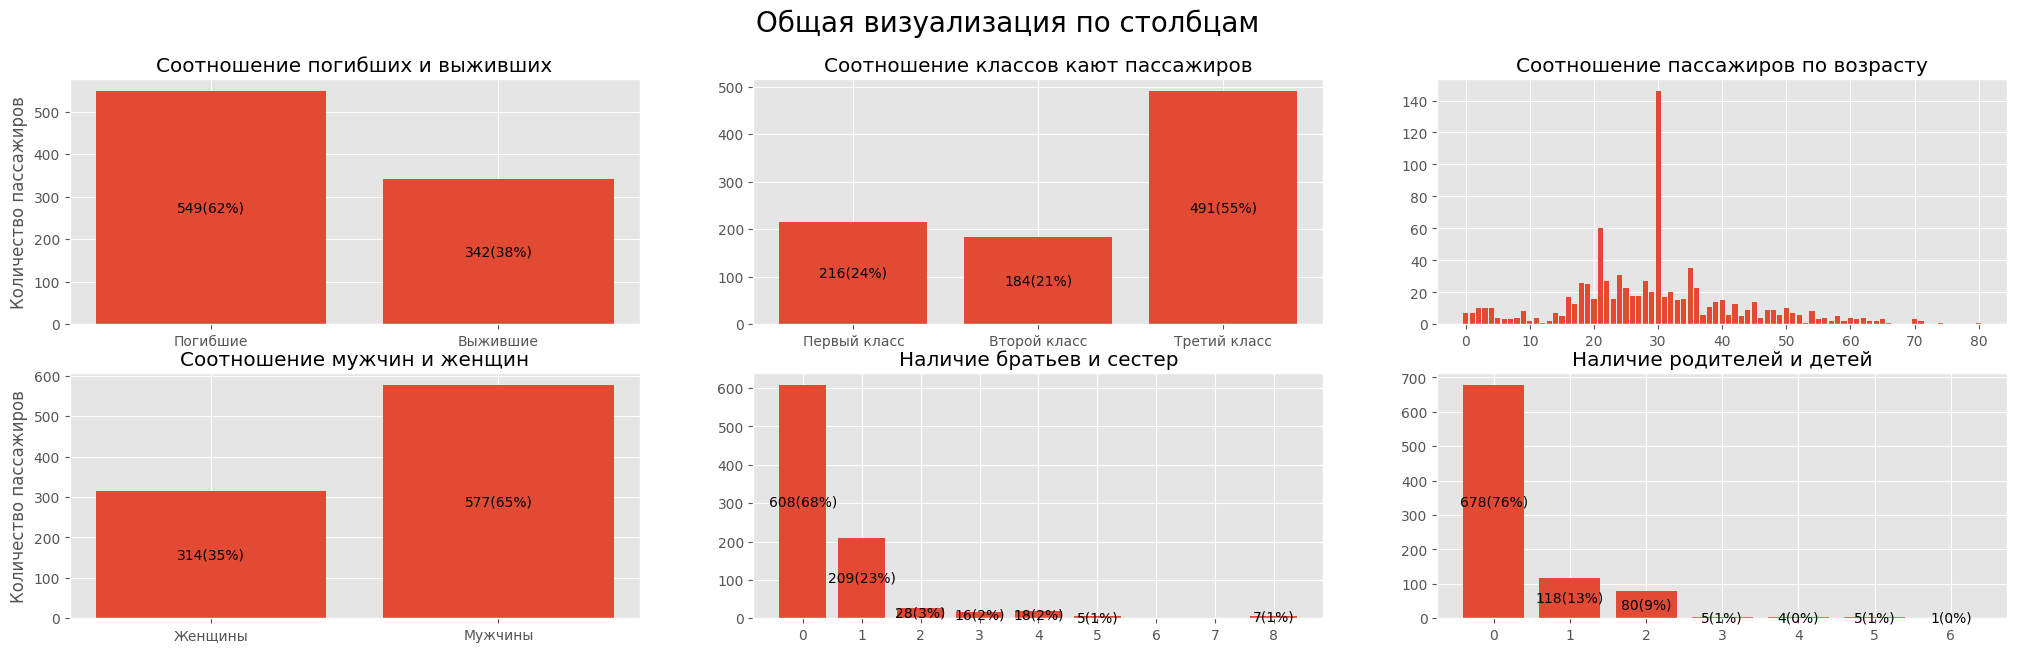

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
import warnings # в случае возникновения matplotlib warning
warnings.filterwarnings("ignore")

f, ax = plt.subplots(figsize = (25,7),nrows= 2, ncols= 3)
features = ['Survived','Pclass','Age','Gender','SibSp','Parch','Embarked']
gs = GridSpec(nrows= 2, ncols= 3, figure=f)
f.suptitle('Общая визуализация по столбцам', fontsize=20)
plt.style.use('ggplot')

#Первый график
ax1 = plt.subplot(gs[0, 0])
ax1.bar(data_train['Survived'].value_counts().index, data_train['Survived'].value_counts())
ax1.set_ylabel('Количество пассажиров')
ax1.set_title('Соотношение погибших и выживших')
xticks = [0,1]
plt.xticks (ticks=xticks, labels = ['Погибшие', 'Выжившие'])

for patch in ax1.patches:
    label_x = patch.get_x() + patch.get_width()/2
    label_y = patch.get_y() + patch.get_height()/2
    ax1.text(label_x, label_y,
               str(int(patch.get_height())) + '(' +
               '{:.0%}'.format(patch.get_height()/len(data_train.Survived))+')',
               horizontalalignment='center', verticalalignment='center')
    
#Второй график
ax2 = plt.subplot(gs[0, 1])
ax2.bar(data_train['Pclass'].value_counts().index, data_train['Pclass'].value_counts())
ax2.set_title('Соотношение классов кают пассажиров')
xticks = [1,2,3]
plt.xticks (ticks=xticks, labels = ['Первый класс', 'Второй класс', 'Третий класс'])

for patch in ax2.patches:
    label_x = patch.get_x() + patch.get_width()/2
    label_y = patch.get_y() + patch.get_height()/2
    ax2.text(label_x, label_y,
               str(int(patch.get_height())) + '(' +
               '{:.0%}'.format(patch.get_height()/len(data_train.Pclass))+')',
               horizontalalignment='center', verticalalignment='center')
#Третий график
ax3 = plt.subplot(gs[0, 2])
ax3.bar(data_train['Age'].value_counts().index, data_train['Age'].value_counts())
ax3.set_title('Соотношение пассажиров по возрасту')

#Четвертый график
ax4 = plt.subplot(gs[1, 0])
ax4.bar(data_train['Gender'].value_counts().index, data_train['Gender'].value_counts())
ax4.set_ylabel('Количество пассажиров')
ax4.set_title('Соотношение мужчин и женщин')
xticks = [0,1]
plt.xticks (ticks=xticks, labels = ['Женщины', 'Мужчины'])

for patch in ax4.patches:
    label_x = patch.get_x() + patch.get_width()/2
    label_y = patch.get_y() + patch.get_height()/2
    ax4.text(label_x, label_y,
                str(int(patch.get_height())) + '(' +
                '{:.0%}'.format(patch.get_height()/len(data_train.Gender))+')',
                horizontalalignment='center', verticalalignment='center')
#Пятый график
ax5 = plt.subplot(gs[1, 1])
ax5.bar(data_train['SibSp'].value_counts().index, data_train['SibSp'].value_counts())
ax5.set_title('Наличие братьев и сестер')
xticks = [0,1,2,3,4,5,6,7,8]
plt.xticks (ticks=xticks)

for patch in ax5.patches:
   label_x = patch.get_x() + patch.get_width()/2
   label_y = patch.get_y() + patch.get_height()/2
   ax5.text(label_x, label_y,
               str(int(patch.get_height())) + '(' +
               '{:.0%}'.format(patch.get_height()/len(data_train.SibSp))+')',
                horizontalalignment='center', verticalalignment='center')
#Шестой график
ax6 = plt.subplot(gs[1, 2])
ax6.bar(data_train['Parch'].value_counts().index, data_train['Parch'].value_counts())
ax6.set_title('Наличие родителей и детей')

for patch in ax6.patches:
    label_x = patch.get_x() + patch.get_width()/2
    label_y = patch.get_y() + patch.get_height()/2
    ax6.text(label_x, label_y,
               str(int(patch.get_height())) + '(' +
               '{:.0%}'.format(patch.get_height()/len(data_train.Parch))+')',
               horizontalalignment='center', verticalalignment='center')

Из показанных графиков можно сделать вывод, что большинство пассажиров погибло (62% на 38%). Среди пассажиров было больше всего мужчин (разница почти в 2 раза). Большее число пассажиров приобрели каюты третьего класса, а вот каюты второго класса выбрало меньше всего человек. Подавляющее число человек путешествовали в одиночестве. Возраст пассажиров в большинстве своем был от 20 до 40 лет.

In [ ]:
#Для того чтобы создать график погибших и выживших пассажиров в зависимости от их половой принадлежности, создадим следующую функцию и добавим получившиеся значения в новый столбец
def f(row):
 if row['Survived'] == 0 and row['Gender'] == 1:
   val = 'Погибло мужчин'
 elif row['Survived'] == 0 and row['Gender'] == 0:
   val = 'Погибло женщин'
 else :
   val = np.nan
 return val

data_train['Gender_Not_Survived'] = data_train.apply (f, axis=1)

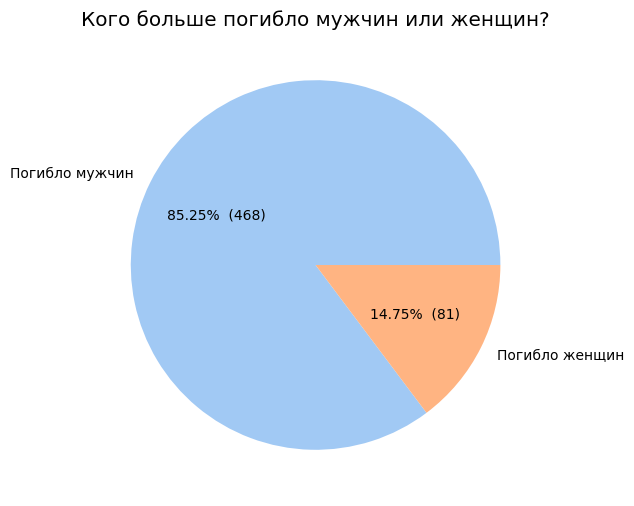

In [ ]:
import seaborn as sns
vals = data_train['Gender_Not_Survived'].value_counts()
labels = data_train['Gender_Not_Survived'].value_counts().index
colors = sns.color_palette('pastel')

def make_autopct(vals):
    def my_autopct(pct):
        total = sum(vals)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.figure(figsize=(6,6))
plt.pie(vals, labels = labels, autopct=make_autopct(vals), colors = colors )
plt.title('Кого больше погибло мужчин или женщин?')
plt.show()

In [ ]:
def f(row):
 if row['Survived'] == 1 and row['Gender'] == 1:
   val = 'Выжило мужчин'
 elif row['Survived'] == 1 and row['Gender'] == 0:
   val = 'Выжило женщин'
 else :
   val = np.nan
 return val

data_train['Gender_Survived'] = data_train.apply (f, axis=1)

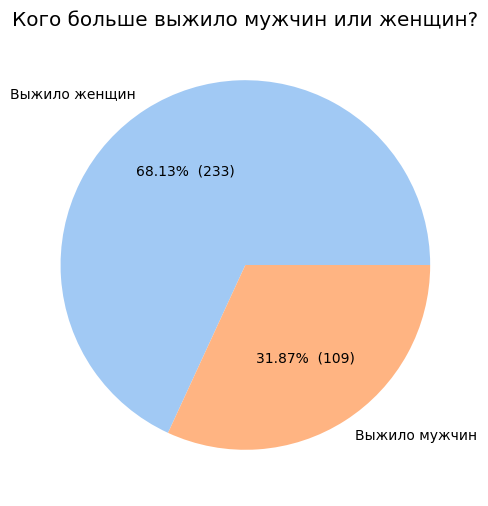

In [ ]:
vals = data_train['Gender_Survived'].value_counts()
labels = data_train['Gender_Survived'].value_counts().index
colors = sns.color_palette('pastel')
plt.figure(figsize=(6,6))

def make_autopct(vals):
    def my_autopct(pct):
        total = sum(vals)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(vals, labels = labels, autopct=make_autopct(vals), colors = colors )
plt.title('Кого больше выжило мужчин или женщин?')
plt.show()

In [ ]:
def f(row):
 if row['Survived'] == 1 and row['Gender'] == 1:
   val = 'Выжило мужчин'
 elif row['Survived'] == 1 and row['Gender'] == 0:
   val = 'Выжило женщин'
 elif row['Survived'] == 0 and row['Gender'] == 1:
   val = 'Погибло мужчин'
 else :
   val = 'Погибло женщин'
 return val

data_train['Gender_mix_Survived'] = data_train.apply (f, axis=1)

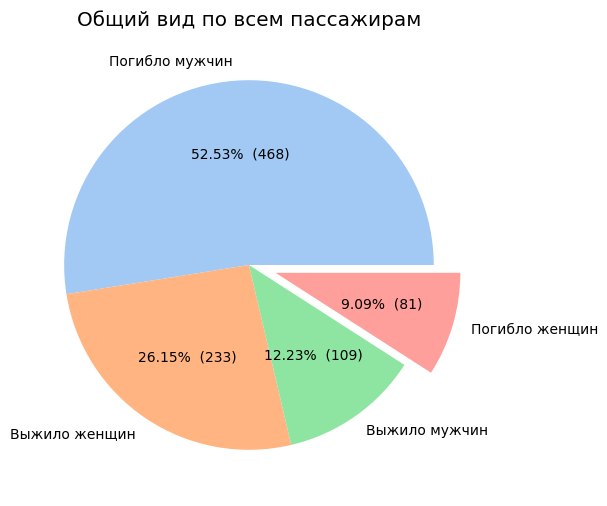

In [ ]:
import seaborn as sns
vals = data_train['Gender_mix_Survived'].value_counts()
labels = data_train['Gender_mix_Survived'].value_counts().index
colors = sns.color_palette('pastel')
plt.figure(figsize=(6,6))
my_exp = [0,0,0,0.15]

def make_autopct(vals):
    def my_autopct(pct):
        total = sum(vals)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(vals, labels = labels, autopct=make_autopct(vals), colors = colors, explode = my_exp)
plt.title('Общий вид по всем пассажирам')
plt.show()

Можно сделать закономерный вывод, что шанс выжить у женщин был гораздо выше, чем у мужчин. Это логично, тк во-первых мужчины зачастую жертвовали свои спасительные места в шлюпках женщинам, а во-вторых мужчин было намного больше, следовательно их и погибло больше.

In [ ]:
#Удалим три вышеупомянутых столбца.
data_train.drop(axis = 1, columns='Gender_Not_Survived', inplace = True)
data_train.drop(axis = 1, columns='Gender_Survived', inplace = True)
data_train.drop(axis = 1, columns='Gender_mix_Survived', inplace = True)
data_train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,New_Cabin,Gender
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27,0,0,211536,13.0000,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19,0,0,112053,30.0000,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",21,1,2,W./C. 6607,23.4500,S,0,0
889,890,1,1,"Behr, Mr. Karl Howell",26,0,0,111369,30.0000,C,1,1


Рассмотрим, как влияет на выживаемость принадлежность каюты пассажира к определенному классу.

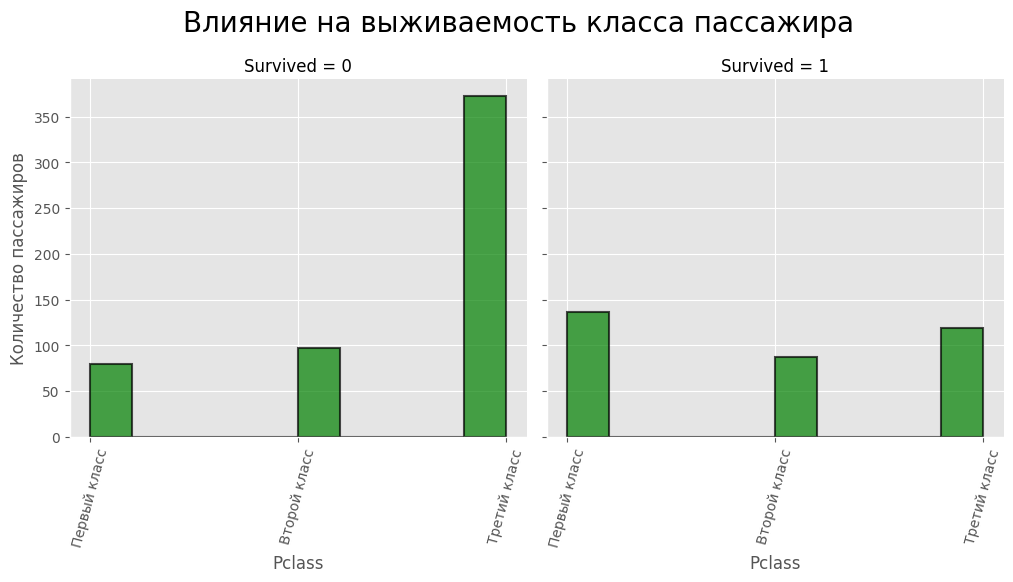

In [ ]:
g = sns.FacetGrid(data_train, col='Survived', height= 5)

plt.suptitle('Влияние на выживаемость класса пассажира', fontsize=20)
g.map(plt.hist, 'Pclass', bins=10, color='g', edgecolor='black', linewidth=1.5,alpha=0.7)
g.axes[0,0].set_ylabel('Количество пассажиров', fontsize=12)
xticks = [1,2,3]
plt.xticks (ticks=xticks, labels = ['Первый класс', 'Второй класс', 'Третий класс'])
[plt.setp(ax.get_xticklabels(), rotation=75) for ax in g.axes.flat]

plt.show()

Как видим бОльшая часть всех погибших были пассажирами третьего класса. Это связано не только с их подавляющим количеством, но и с труднодоступностью шлюпок для этих пассажиров. Шанс спастись у пассажиров первого класса был гораздо выше, чем у других пассажиров. Данный факт связан наоборот с доступностью шлюпок, и знатностью пассажиров. У пассажиров второго класса, как следует из этого графика, шансов выжить было чуть больше, чем погибнуть.

Рассмотрим детальнее, как влияет на выживаемость возраст пассажиров.

In [ ]:
#Построим пузырьковую диаграмму.
import matplotlib.patches as mpatches
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(
    x= data_train['Age'].value_counts().index,
    y= data_train['Survived'],
    text=data_train['Age'].value_counts(),
    mode='markers',
    marker=dict(
        size=data_train['Age'].value_counts(),
        sizemode='area',
        sizeref=2*max(data_train['Age'].value_counts())/(50.**2),
        sizemin=4, color = np.random.rand(100))    

)])

fig.update_layout(
    title='Влияние возраста на выживаемость пассажиров',
    xaxis=dict(
        title='Возраст пассажиров',
        gridcolor='white',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Погибшие пассажиры/Выжившие пассажиры',
        gridcolor='white',
        gridwidth=2))

fig.show()

Видно, что наибольшее число выживших (60 человек) были в возрасте 21 года, а наибольшее число погибших в возрасте 30 лет (146 человек). Также из этого графика следует, что на борту были представители всех возрастов (от младенцев, кому и года не исполнилось до 80 летних стариков). Большее число выживших были возрастом от 21 до 47 лет, а большее число погибших от 1 до 34 лет.  

In [ ]:
#Теперь, чтобы сократить колличество возможных значений и улучшить точность модели, сгруппируем все многообразие возрастов к нескольким категориальным значениям и посмотрим на выживание по группам.
def f(row):
 if row['Age'] <= 15:
   val = '0'
 elif row['Age'] > 15 and row['Age'] <= 30:
   val = '1'
 elif row['Age'] > 30 and row['Age'] <= 48:
   val = '2'
 elif row['Age'] > 48 and row['Age'] <= 64:
   val = '3'
 else :
   val = '4'
 return val

data_train['Age_Group'] = data_train.apply (f, axis=1)
data_train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,New_Cabin,Gender,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,S,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,C,1,0,2
2,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,S,1,0,2
4,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,S,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27,0,0,211536,13.0000,S,0,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",19,0,0,112053,30.0000,S,1,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",21,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26,0,0,111369,30.0000,C,1,1,1


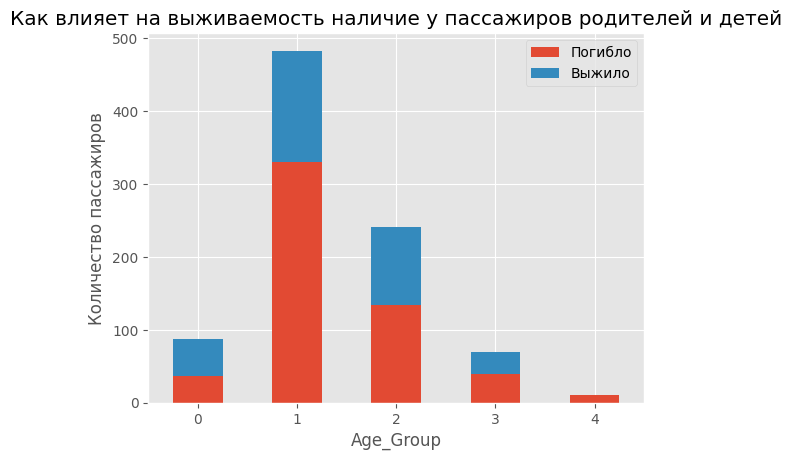

In [ ]:
colors = sns.color_palette("flare")
data_train.pivot_table('PassengerId', 'Age_Group', 'Survived', 'count').plot(kind='bar', stacked=True, rot=0)
plt.title('Как влияет на выживаемость наличие у пассажиров родителей и детей')
plt.ylabel('Количество пассажиров')
plt.legend(['Погибло','Выжило'])

plt.show()

In [ ]:
#Проделываем аналогичные процедуры со столбцом Fare.
data_train['Fare_Group'] = pd.qcut(data_train['Fare'], 4)
data_train[['Fare_Group', 'Survived']].groupby(['Fare_Group'], as_index=False).mean()

,Fare_Group,Survived
0,"(4.010999999999999, 7.925]",0.225664
1,"(7.925, 14.5]",0.286364
2,"(14.5, 31.275]",0.440000
3,"(31.275, 512.329]",0.586364


In [ ]:
def f(row):
 if row['Fare'] <= 7.925:
   val = '4'
 elif row['Fare'] > 7.925 and row['Fare'] <= 14.5:
   val = '3'
 elif row['Fare'] > 14.5 and row['Fare'] <= 31.275:
   val = '2'
 else :
   val = '1'
 return val

data_train['Fare_Group'] = data_train.apply (f, axis=1)
data_train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,New_Cabin,Gender,Age_Group,Fare_Group
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,S,0,1,1,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,C,1,0,2,1
2,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,S,0,0,1,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,S,1,0,2,1
4,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,S,0,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27,0,0,211536,13.0000,S,0,1,1,3
887,888,1,1,"Graham, Miss. Margaret Edith",19,0,0,112053,30.0000,S,1,0,1,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",21,1,2,W./C. 6607,23.4500,S,0,0,1,2
889,890,1,1,"Behr, Mr. Karl Howell",26,0,0,111369,30.0000,C,1,1,1,2


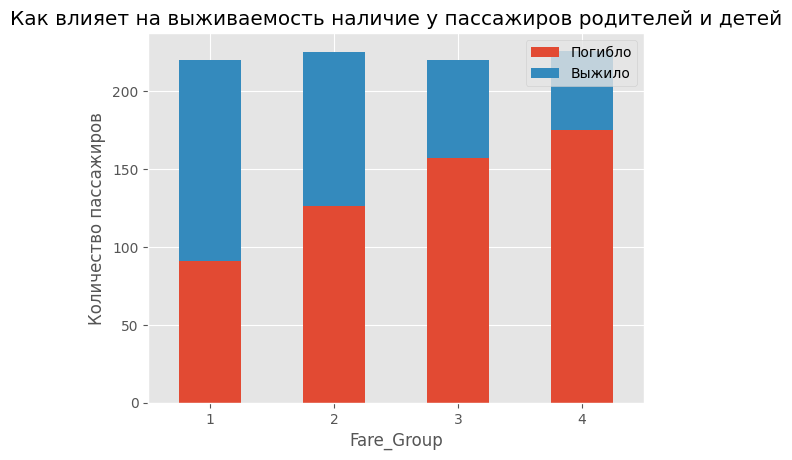

In [ ]:
colors = sns.color_palette("flare")
data_train.pivot_table('PassengerId', 'Fare_Group', 'Survived', 'count').plot(kind='bar', stacked=True, rot=0)
plt.title('Как влияет на выживаемость наличие у пассажиров родителей и детей')
plt.ylabel('Количество пассажиров')
plt.legend(['Погибло','Выжило'])

plt.show()

In [ ]:
data_train.drop(axis = 1, columns='Fare', inplace = True)
data_train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Embarked,New_Cabin,Gender,Age_Group,Fare_Group
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,S,0,1,1,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,C,1,0,2,1
2,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,S,0,0,1,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,S,1,0,2,1
4,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,S,0,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27,0,0,211536,S,0,1,1,3
887,888,1,1,"Graham, Miss. Margaret Edith",19,0,0,112053,S,1,0,1,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",21,1,2,W./C. 6607,S,0,0,1,2
889,890,1,1,"Behr, Mr. Karl Howell",26,0,0,111369,C,1,1,1,2


Теперь перейдем к тому как влияло на выживаемость тот факт, что у человека на борту были родственники. 

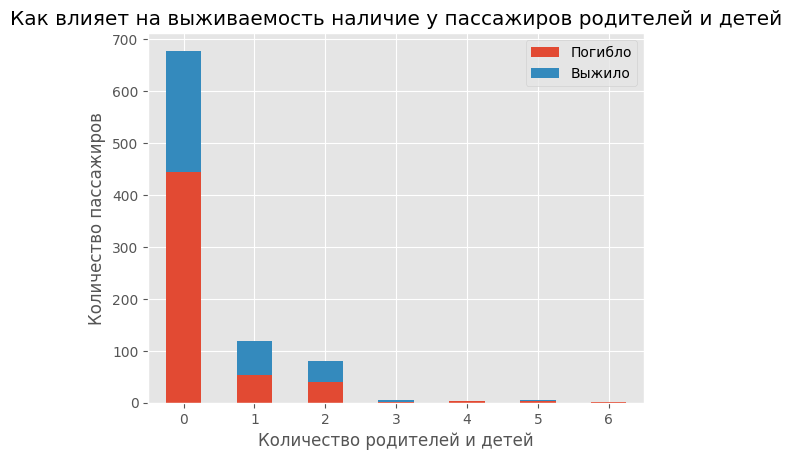

In [ ]:
#Проследим взаимосвязь выживаемости пассажиров и наличии у них родителей и детей. 
colors = sns.color_palette("flare")
data_train.pivot_table('PassengerId', 'Parch', 'Survived', 'count').plot(kind='bar', stacked=True, rot=0)
plt.title('Как влияет на выживаемость наличие у пассажиров родителей и детей')
plt.ylabel('Количество пассажиров')
plt.xlabel('Количество родителей и детей')
plt.legend(['Погибло','Выжило'])

plt.show()

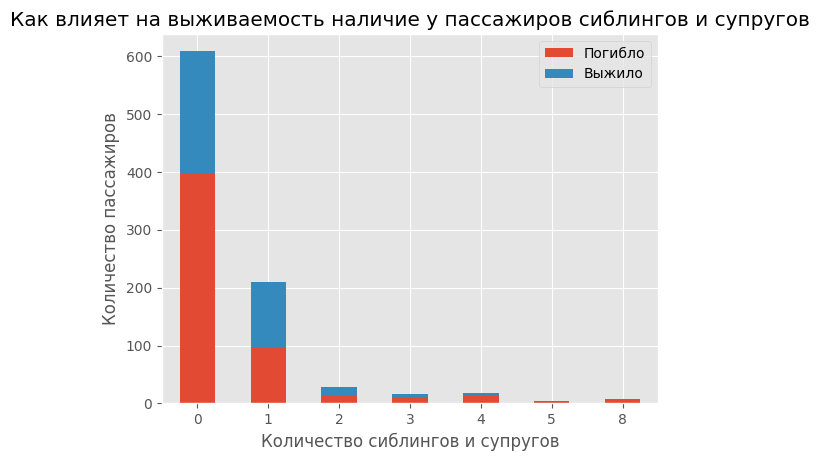

In [ ]:
#Проследим взаимосвязь выживаемости пассажиров и наличии у них сиблингов и супругов.
colors = sns.color_palette("flare")
data_train.pivot_table('PassengerId', 'SibSp', 'Survived', 'count').plot(kind='bar', stacked=True, rot=0)
plt.title('Как влияет на выживаемость наличие у пассажиров сиблингов и супругов')
plt.ylabel('Количество пассажиров')
plt.xlabel('Количество сиблингов и супругов')
plt.legend(['Погибло','Выжило'])

plt.show()

Как видно на предыдущих графиках у большиснтва пассажиров не было на борту родственников, построим отдельный столбец и проследим зависимость наличия родственников на выживаемость.

In [ ]:
def f(row):
 if row['SibSp'] == 0 and row['Parch'] == 1:
   val = '1'
 elif row['SibSp'] == 0 and row['Parch'] == 2:
   val = '1'
 elif row['SibSp'] == 1 and row['Parch'] == 0:
   val = '1'
 elif row['SibSp'] == 2 and row['Parch'] == 0:
   val = '1'
 elif row['SibSp'] == 1 and row['Parch'] == 1:
   val = '1'
 elif row['SibSp'] >= 2 and row['Parch'] != 0:
   val = '2'
 elif row['SibSp'] != 0 and row['Parch'] >= 2:
   val = '2'
 else :
   val = '0'
 return val

data_train['Family'] = data_train.apply (f, axis=1)
data_train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Embarked,New_Cabin,Gender,Age_Group,Fare_Group,Family
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,S,0,1,1,4,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,C,1,0,2,1,1
2,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,S,0,0,1,4,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,S,1,0,2,1,1
4,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,S,0,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27,0,0,211536,S,0,1,1,3,0
887,888,1,1,"Graham, Miss. Margaret Edith",19,0,0,112053,S,1,0,1,2,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",21,1,2,W./C. 6607,S,0,0,1,2,2
889,890,1,1,"Behr, Mr. Karl Howell",26,0,0,111369,C,1,1,1,2,0


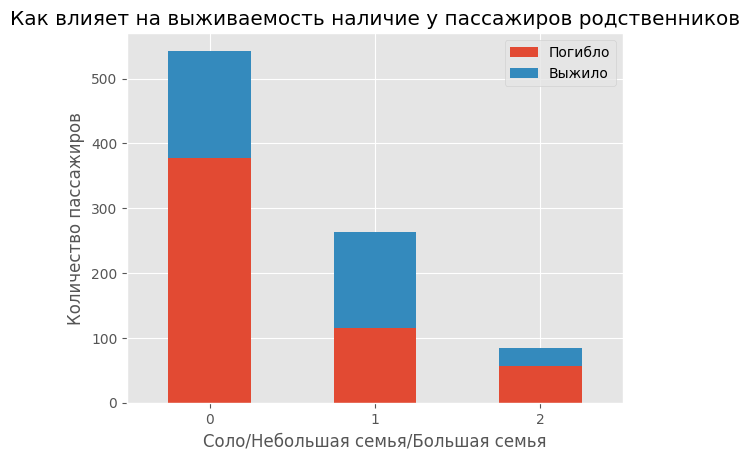

In [ ]:
colors = sns.color_palette("flare")
data_train.pivot_table('PassengerId', 'Family', 'Survived', 'count').plot(kind='bar', stacked=True, rot=0)
plt.title('Как влияет на выживаемость наличие у пассажиров родственников')
plt.ylabel('Количество пассажиров')
plt.legend(['Погибло','Выжило'])
plt.xlabel('Соло/Небольшая семья/Большая семья')

plt.show()

Делаем вывод, что в целом шанс выжить был выше у тех, у кого на борту были родственники и наоборот большее число погибших путешествовали в одиночестве. Но необходимо сделать оговорку - слишком большое число родных, наоборот снижали вероятность выживания. Наибольшее соотношение в пользу выживания было у тех, кто путешествовал небольшой семьей.

In [ ]:
def f(row):
 if row['Embarked'] == 'S':
   val = '1'
 elif row['Embarked'] == 'C':
   val = '2'
 else :
   val = '3'
 return val

data_train['Embarked'] = data_train.apply (f, axis=1)
data_train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Embarked,New_Cabin,Gender,Age_Group,Fare_Group,Family
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,1,0,1,1,4,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,2,1,0,2,1,1
2,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,1,0,0,1,4,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,1,1,0,2,1,1
4,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,1,0,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27,0,0,211536,1,0,1,1,3,0
887,888,1,1,"Graham, Miss. Margaret Edith",19,0,0,112053,1,1,0,1,2,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",21,1,2,W./C. 6607,1,0,0,1,2,2
889,890,1,1,"Behr, Mr. Karl Howell",26,0,0,111369,2,1,1,1,2,0


Выдвинем предположение, что в первую очередь пытались спасти женщин и детей и проверим так ли это на самом деле.

In [ ]:
#Создаем новый столбец women+child
def f(row):
 if row['Gender'] == 0:
   val = True
 elif row['Age'] <= 14:
   val = True
 else :
   val = False 
 return val

data_train['women_child'] = data_train.apply (f, axis=1)
data_train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Embarked,New_Cabin,Gender,Age_Group,Fare_Group,Family,women_child
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,1,0,1,1,4,1,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,2,1,0,2,1,1,True
2,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,1,0,0,1,4,0,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,1,1,0,2,1,1,True
4,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,1,0,1,2,3,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27,0,0,211536,1,0,1,1,3,0,False
887,888,1,1,"Graham, Miss. Margaret Edith",19,0,0,112053,1,1,0,1,2,0,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",21,1,2,W./C. 6607,1,0,0,1,2,2,True
889,890,1,1,"Behr, Mr. Karl Howell",26,0,0,111369,2,1,1,1,2,0,False


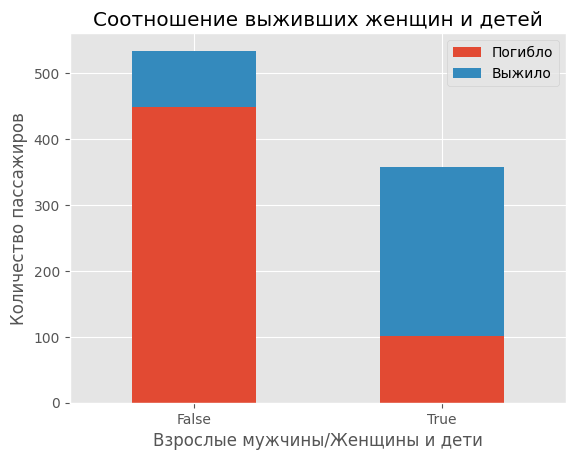

In [ ]:
#Предположение оказалось верным.
colors = sns.color_palette("flare")
data_train.pivot_table('PassengerId', 'women_child', 'Survived', 'count').plot(kind='bar', stacked=True, rot=0)
plt.title('Соотношение выживших женщин и детей')
plt.ylabel('Количество пассажиров')
plt.legend(['Погибло','Выжило'])
plt.xlabel('Взрослые мужчины/Женщины и дети')

plt.show()

<Axes: >

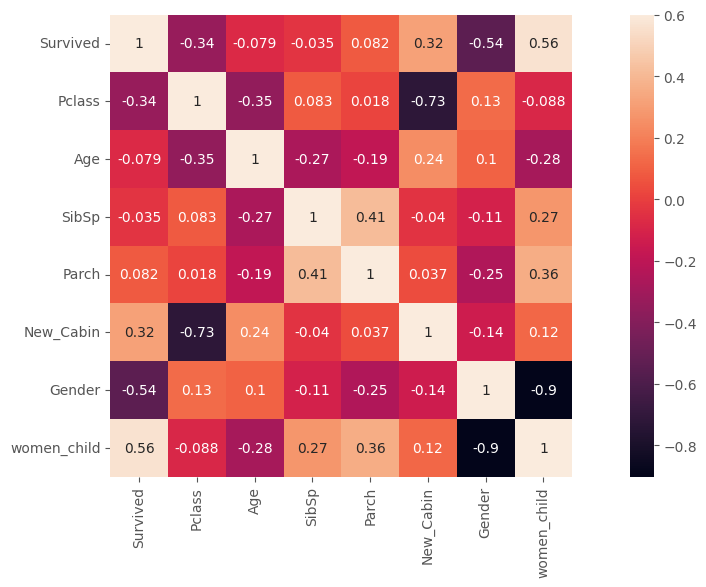

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(data_train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

Лично мне не нравится, что столбцы с обозначением пола и наличия каюты стоят в конце. Визуально хочется их поставить ближе к центру. Например так:

In [ ]:
data_train = data_train[['PassengerId', 'Survived', 'Pclass','New_Cabin', 'Name','Gender','Age_Group','women_child','SibSp','Parch','Family','Ticket','Fare_Group','Embarked']]
data_train

,PassengerId,Survived,Pclass,New_Cabin,Name,Gender,Age_Group,women_child,SibSp,Parch,Family,Ticket,Fare_Group,Embarked
0,1,0,3,0,"Braund, Mr. Owen Harris",1,1,False,1,0,1,A/5 21171,4,1
1,2,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,True,1,0,1,PC 17599,1,2
2,3,1,3,0,"Heikkinen, Miss. Laina",0,1,True,0,0,0,STON/O2. 3101282,4,1
3,4,1,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,True,1,0,1,113803,1,1
4,5,0,3,0,"Allen, Mr. William Henry",1,2,False,0,0,0,373450,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,"Montvila, Rev. Juozas",1,1,False,0,0,0,211536,3,1
887,888,1,1,1,"Graham, Miss. Margaret Edith",0,1,True,0,0,0,112053,2,1
888,889,0,3,0,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,True,1,2,2,W./C. 6607,2,1
889,890,1,1,1,"Behr, Mr. Karl Howell",1,1,False,0,0,0,111369,2,2


**ЭТАП №2.2 ПОДГОТОВКА ТЕСТОВЫХ ДАННЫХ.**

In [ ]:
#Предпросмотр тестовых данных
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data_test = pd.read_csv('/content/test.csv', decimal='.', delimiter=',')
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
#Выведем количество заполненных строк.
pd.isnull(data_test)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
#Выведем количество пропусков в каждом столбце.
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

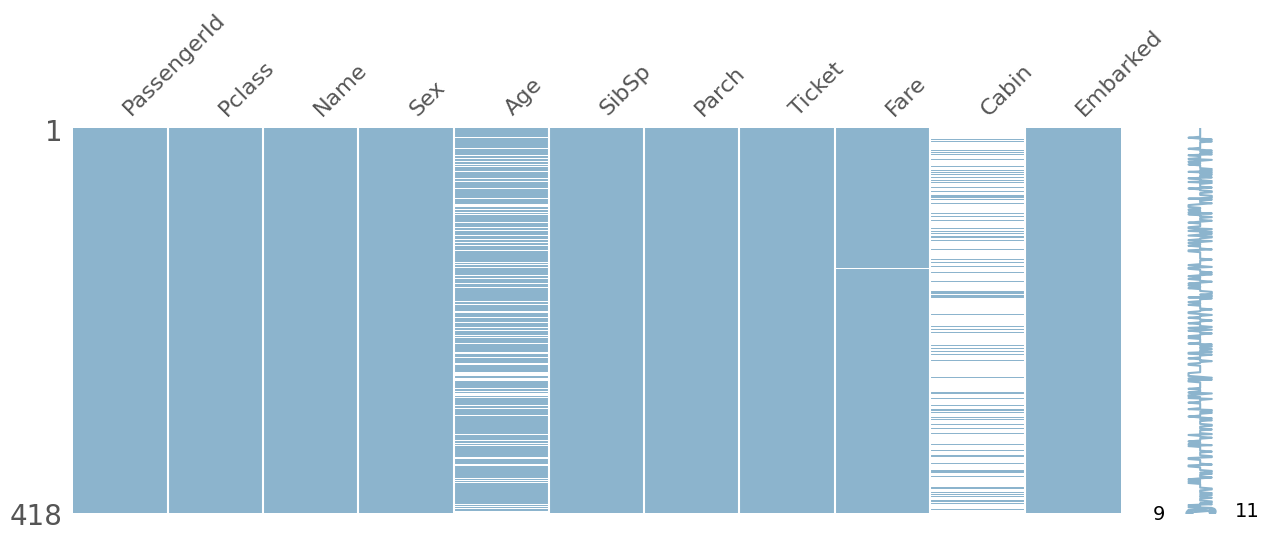

In [ ]:
#Визуализируем пропуски для более наглядного представления.
import missingno as msno

msno.matrix(data_test, figsize=(15,5), color= (140 / 255, 180 / 255, 205 / 255))

Как видно из предварительного анализа, данный датасет содержит 3 столбца с пропусками, которые необходимо заполнить. Наибольше колличество пропусков находится в столбце, который указывает на номер каюты (Cabin), а наименьшее в столбце, где определена стоимость билета (Fare).

In [ ]:
#Единственный пропуск в столбце Fare можно заполнить средним значением по столбцу.
import math

data_test['Fare'].fillna(data_test['Fare'].mean(), inplace = True)
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
#Выполняем проверку. Столбец Fare заполнен
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
#По аналогии работы с тренировочными данными создаем новый столбце New_Cabin и заполняем его.
data_test['New_Cabin'] = np.where(data_test['Cabin'].str.contains("ohc"), 0, 1)
data_test.drop(axis = 1, columns='Cabin', inplace = True)
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,New_Cabin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,0


In [ ]:
#Выполняем проверку. Новый столбец New_Cabin заполнен.
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
 10  New_Cabin    418 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [ ]:
#Точно также для определения возраста создаем дополнительный столбец, куда выносим все гоноративы пассажиров.

data_test['Title'] = data_test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
data_test['Title'].value_counts()
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,New_Cabin,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,0,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,1,Dona
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,0,Mr
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,0,Mr


In [ ]:
#Заполняем пропуски медианой в соответствии с гоноративом.
data_test['Age'].fillna(data_test.groupby('Title')['Age'].transform('median'), inplace=True)
data_test['Age'] = data_test['Age']. replace (np.nan, 21) #Не получалось заполнить одну единственную строку (PassengerID 980), загуглил - возраст O'Donoghue, Ms. Bridget на момент крушения составлял 21 год. 	
data_test['Age'] = data_test['Age'].astype (int)
data_test.drop(axis = 1, columns='Title', inplace = True)
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,New_Cabin
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,S,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28,0,0,A.5. 3236,8.0500,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,S,0
416,1308,3,"Ware, Mr. Frederick",male,28,0,0,359309,8.0500,S,0


In [ ]:
#Выполняем проверку. Все столбцы заполнены
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    int64  
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
 10  New_Cabin    418 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 36.0+ KB


In [ ]:
#Конвертируем данные о гендере для нового столбца в числовые значения для более точного прогноза, где 1 - мужчины, 0 - женщины.
data_test['Gender'] = data_test['Gender'] = data_test.Sex.apply(lambda x: 0 if x == 'female' else 1)
data_test.drop(axis = 1, columns='Sex', inplace = True)
data_test

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,New_Cabin,Gender
0,892,3,"Kelly, Mr. James",34,0,0,330911,7.8292,Q,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47,1,0,363272,7.0000,S,0,0
2,894,2,"Myles, Mr. Thomas Francis",62,0,0,240276,9.6875,Q,0,1
3,895,3,"Wirz, Mr. Albert",27,0,0,315154,8.6625,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22,1,1,3101298,12.2875,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",28,0,0,A.5. 3236,8.0500,S,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",39,0,0,PC 17758,108.9000,C,1,0
415,1307,3,"Saether, Mr. Simon Sivertsen",38,0,0,SOTON/O.Q. 3101262,7.2500,S,0,1
416,1308,3,"Ware, Mr. Frederick",28,0,0,359309,8.0500,S,0,1


In [ ]:
#В столбце Fare также присутствуют нули. Заменим все нули на средние значения в соответствии с классом пассажира.
data_test["Fare"] = data_test["Fare"].replace(0, np.nan)
data_test['Fare'].fillna(data_test.groupby('Pclass')['Fare'].transform('median'), inplace=True)
data_test

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,New_Cabin,Gender
0,892,3,"Kelly, Mr. James",34,0,0,330911,7.8292,Q,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47,1,0,363272,7.0000,S,0,0
2,894,2,"Myles, Mr. Thomas Francis",62,0,0,240276,9.6875,Q,0,1
3,895,3,"Wirz, Mr. Albert",27,0,0,315154,8.6625,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22,1,1,3101298,12.2875,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",28,0,0,A.5. 3236,8.0500,S,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",39,0,0,PC 17758,108.9000,C,1,0
415,1307,3,"Saether, Mr. Simon Sivertsen",38,0,0,SOTON/O.Q. 3101262,7.2500,S,0,1
416,1308,3,"Ware, Mr. Frederick",28,0,0,359309,8.0500,S,0,1


In [ ]:
#Создаем столбец Family
def f(row):
 if row['SibSp'] == 0 and row['Parch'] == 1:
   val = '1'
 elif row['SibSp'] == 0 and row['Parch'] == 2:
   val = '1'
 elif row['SibSp'] == 1 and row['Parch'] == 0:
   val = '1'
 elif row['SibSp'] == 2 and row['Parch'] == 0:
   val = '1'
 elif row['SibSp'] == 1 and row['Parch'] == 1:
   val = '1'
 elif row['SibSp'] >= 2 and row['Parch'] != 0:
   val = '2'
 elif row['SibSp'] != 0 and row['Parch'] >= 2:
   val = '2'
 else :
   val = '0'
 return val

data_test['Family'] = data_test.apply (f, axis=1)
data_test

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,New_Cabin,Gender,Family
0,892,3,"Kelly, Mr. James",34,0,0,330911,7.8292,Q,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47,1,0,363272,7.0000,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62,0,0,240276,9.6875,Q,0,1,0
3,895,3,"Wirz, Mr. Albert",27,0,0,315154,8.6625,S,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22,1,1,3101298,12.2875,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",28,0,0,A.5. 3236,8.0500,S,0,1,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",39,0,0,PC 17758,108.9000,C,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",38,0,0,SOTON/O.Q. 3101262,7.2500,S,0,1,0
416,1308,3,"Ware, Mr. Frederick",28,0,0,359309,8.0500,S,0,1,0


In [ ]:
def f(row):
 if row['Embarked'] == 'S':
   val = '1'
 elif row['Embarked'] == 'C':
   val = '2'
 else :
   val = '3'
 return val

data_test['Embarked'] = data_test.apply (f, axis=1)
data_test

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,New_Cabin,Gender,Family
0,892,3,"Kelly, Mr. James",34,0,0,330911,7.8292,3,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47,1,0,363272,7.0000,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62,0,0,240276,9.6875,3,0,1,0
3,895,3,"Wirz, Mr. Albert",27,0,0,315154,8.6625,1,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22,1,1,3101298,12.2875,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",28,0,0,A.5. 3236,8.0500,1,0,1,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",39,0,0,PC 17758,108.9000,2,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",38,0,0,SOTON/O.Q. 3101262,7.2500,1,0,1,0
416,1308,3,"Ware, Mr. Frederick",28,0,0,359309,8.0500,1,0,1,0


In [ ]:
#Создаем новый столбец women+child
def f(row):
 if row['Gender'] == 0:
   val = True
 elif row['Age'] <= 14:
   val = True
 else :
   val = False 
 return val

data_test['women_child'] = data_test.apply (f, axis=1)
data_test

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,New_Cabin,Gender,Family,women_child
0,892,3,"Kelly, Mr. James",34,0,0,330911,7.8292,3,0,1,0,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47,1,0,363272,7.0000,1,0,0,1,True
2,894,2,"Myles, Mr. Thomas Francis",62,0,0,240276,9.6875,3,0,1,0,False
3,895,3,"Wirz, Mr. Albert",27,0,0,315154,8.6625,1,0,1,0,False
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22,1,1,3101298,12.2875,1,0,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",28,0,0,A.5. 3236,8.0500,1,0,1,0,False
414,1306,1,"Oliva y Ocana, Dona. Fermina",39,0,0,PC 17758,108.9000,2,1,0,0,True
415,1307,3,"Saether, Mr. Simon Sivertsen",38,0,0,SOTON/O.Q. 3101262,7.2500,1,0,1,0,False
416,1308,3,"Ware, Mr. Frederick",28,0,0,359309,8.0500,1,0,1,0,False


In [ ]:
#Теперь, чтобы сократить колличество возможных значений и улучшить точность модели, сгруппируем все многообразие возрастов к нескольким категориальным значениям и посмотрим на выживание по группам.
def f(row):
 if row['Age'] <= 15:
   val = '0'
 elif row['Age'] > 15 and row['Age'] <= 30:
   val = '1'
 elif row['Age'] > 30 and row['Age'] <= 48:
   val = '2'
 elif row['Age'] > 48 and row['Age'] <= 64:
   val = '3'
 else :
   val = '4'
 return val

data_test['Age_Group'] = data_test.apply (f, axis=1)
data_test

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,New_Cabin,Gender,Family,women_child,Age_Group
0,892,3,"Kelly, Mr. James",34,0,0,330911,7.8292,3,0,1,0,False,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47,1,0,363272,7.0000,1,0,0,1,True,2
2,894,2,"Myles, Mr. Thomas Francis",62,0,0,240276,9.6875,3,0,1,0,False,3
3,895,3,"Wirz, Mr. Albert",27,0,0,315154,8.6625,1,0,1,0,False,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22,1,1,3101298,12.2875,1,0,0,1,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",28,0,0,A.5. 3236,8.0500,1,0,1,0,False,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",39,0,0,PC 17758,108.9000,2,1,0,0,True,2
415,1307,3,"Saether, Mr. Simon Sivertsen",38,0,0,SOTON/O.Q. 3101262,7.2500,1,0,1,0,False,2
416,1308,3,"Ware, Mr. Frederick",28,0,0,359309,8.0500,1,0,1,0,False,1


In [ ]:
def f(row):
 if row['Fare'] <= 7.925:
   val = '4'
 elif row['Fare'] > 7.925 and row['Fare'] <= 14.5:
   val = '3'
 elif row['Fare'] > 14.5 and row['Fare'] <= 31.275:
   val = '2'
 else :
   val = '1'
 return val

data_test['Fare_Group'] = data_test.apply (f, axis=1)
data_test

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,New_Cabin,Gender,Family,women_child,Age_Group,Fare_Group
0,892,3,"Kelly, Mr. James",34,0,0,330911,7.8292,3,0,1,0,False,2,4
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47,1,0,363272,7.0000,1,0,0,1,True,2,4
2,894,2,"Myles, Mr. Thomas Francis",62,0,0,240276,9.6875,3,0,1,0,False,3,3
3,895,3,"Wirz, Mr. Albert",27,0,0,315154,8.6625,1,0,1,0,False,1,3
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22,1,1,3101298,12.2875,1,0,0,1,True,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",28,0,0,A.5. 3236,8.0500,1,0,1,0,False,1,3
414,1306,1,"Oliva y Ocana, Dona. Fermina",39,0,0,PC 17758,108.9000,2,1,0,0,True,2,1
415,1307,3,"Saether, Mr. Simon Sivertsen",38,0,0,SOTON/O.Q. 3101262,7.2500,1,0,1,0,False,2,4
416,1308,3,"Ware, Mr. Frederick",28,0,0,359309,8.0500,1,0,1,0,False,1,3


In [ ]:
#Приведем расположение столбцов к единообразию с тренировочными данными.
data_test = data_test[['PassengerId', 'Pclass','New_Cabin', 'Name','Gender','Age_Group','women_child','SibSp','Parch','Family','Ticket','Fare_Group','Embarked']]
data_test

,PassengerId,Pclass,New_Cabin,Name,Gender,Age_Group,women_child,SibSp,Parch,Family,Ticket,Fare_Group,Embarked
0,892,3,0,"Kelly, Mr. James",1,2,False,0,0,0,330911,4,3
1,893,3,0,"Wilkes, Mrs. James (Ellen Needs)",0,2,True,1,0,1,363272,4,1
2,894,2,0,"Myles, Mr. Thomas Francis",1,3,False,0,0,0,240276,3,3
3,895,3,0,"Wirz, Mr. Albert",1,1,False,0,0,0,315154,3,1
4,896,3,0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,True,1,1,1,3101298,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,"Spector, Mr. Woolf",1,1,False,0,0,0,A.5. 3236,3,1
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,2,True,0,0,0,PC 17758,1,2
415,1307,3,0,"Saether, Mr. Simon Sivertsen",1,2,False,0,0,0,SOTON/O.Q. 3101262,4,1
416,1308,3,0,"Ware, Mr. Frederick",1,1,False,0,0,0,359309,3,1


**ЭТАП № 3. ПОСТАНОВКА ЗАДАЧИ И ПОСТРОЕНИЕ МОДЕЛИ.**

Задача формулируется достаточно просто: предсказать кто из пассажиров, представленных в test.csv выживет, а кто погибнет в момент кораблекрушения, опираясь на данные из train.csv. 
Для каждого из применямых в дальнейшем алгоритмов машинного обучения необходимо определить точность его работы на тестовой выборке после обучения на тренировочном наборе. Это даст нам возможность выбрать наиболее точный алгоритм для дальнейшей работы и предсказания финальных результатов.

Для начала определим тренировочный и тестовые наборы, для этого введем следующие новые переменнные:

1. X_train - признаки, которые мы решили использовать для обучения из тренировочного набора данных.
2. y_train - ответы из тренировочного набора, которые соответсвуют признакам X_train.
3. X_test - новые признаки из тестового набора, которые мы  используем в процессе обучения.
4. y_test - объект поиска.

In [ ]:
# ОБУЧЕНИЕ С ПОМОЩЬЮ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold #кросс-валидация - процедура, используемая для оценки квалификации модели на новых данных.
from sklearn.model_selection import cross_val_score #оценка оценки
from sklearn.model_selection import cross_val_predict #прогноз

X = data_train[['Pclass','New_Cabin','Age_Group','women_child','Family','Fare_Group']]
y = data_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

print('------------------Точность модели------------------------')
print('Точность модели логистической регрессии:',round(accuracy_score(y_pred, y_test)*100,2),'%')

kfold = KFold(n_splits=10, random_state=42,shuffle=True) # k=10 - разделение данных на 10 равных частей.
result_LR=cross_val_score(LR,X,y,cv=10,scoring='accuracy')
y_pred = cross_val_predict(LR,X,y,cv=10)
kross_LR = round(result_LR.mean()*100,2)

print('Оценка кросс-валидации логистической регрессии:',kross_LR, '%')

------------------Точность модели------------------------
Точность модели логистической регрессии: 83.21 %
Оценка кросс-валидации логистической регрессии: 81.92 %


In [ ]:
# ОБУЧЕНИЕ С ПОМОЩЬЮ МЕТОДА K-NN БЛИЖАЙШИХ СОСЕДЕЙ

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn.model_selection import KFold #кросс-валидация - процедура, используемая для оценки квалификации модели на новых данных.
from sklearn.model_selection import cross_val_score #оценка оценки
from sklearn.model_selection import cross_val_predict #прогноз

X = data_train[['Pclass','New_Cabin','Age_Group','women_child','Family','Fare_Group']]
y = data_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

kNN=KNeighborsClassifier()
kNN.fit(X_train,y_train)
y_pred=kNN.predict(X_test)

print('------------------Точность модели------------------------')
print('Точность модели:',round(accuracy_score(y_pred, y_test)*100,2),'%')

kfold = KFold(n_splits=10, random_state=42,shuffle=True) # k=10 - разделение данных на 10 равных частей.
result_kNN=cross_val_score(kNN,X,y,cv=10,scoring='accuracy')
y_pred = cross_val_predict(kNN,X,y,cv=10)
kross_kNN = round(result_kNN.mean()*100,2)

print('Оценка кросс-валидации:',kross_kNN, '%')

------------------Точность модели------------------------
Точность модели: 80.97 %
Оценка кросс-валидации: 82.27 %


In [ ]:
# ОБУЧЕНИЕ С ПОМОЩЬЮ МЕТОДА СЛУЧАЙНОГО ЛЕСА
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn.model_selection import KFold #кросс-валидация - процедура, используемая для оценки квалификации модели на новых данных.
from sklearn.model_selection import cross_val_score #оценка оценки
from sklearn.model_selection import cross_val_predict #прогноз

X = data_train[['Pclass','New_Cabin','Age_Group','women_child','Family','Fare_Group']]
y = data_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

RFC = RandomForestClassifier()                     

RFC.fit(X_train, y_train)
y_pred=RFC.predict(X_test)

print('------------------Точность модели------------------')
print('Точность модели:',round(accuracy_score(y_pred, y_test)*100,2),'%')

kfold = KFold(n_splits=10, random_state=42,shuffle=True) # k=10 - разделение данных на 10 равных частей.
result_RFC=cross_val_score(RFC,X,y,cv=10,scoring='accuracy')
y_pred = cross_val_predict(RFC,X,y,cv=10)
kross_RFC = round(result_RFC.mean()*100,2)

print('Оценка кросс-валидации:',kross_RFC, '%')

------------------Точность модели------------------
Точность модели: 82.96 %
Оценка кросс-валидации: 82.83 %


In [ ]:
# ОБУЧЕНИЕ С ПОМОЩЬЮ МЕТОДА РЕШАЮЩИХ ДЕРЕВЬЕВ (decision tree)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

X = data_train[['Pclass','New_Cabin','Age_Group','women_child','Family','Fare_Group']]
y = data_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
y_pred=DTC.predict(X_test)

print('------------------Точность модели------------------')
print('Точность модели:',round(accuracy_score(y_pred, y_test)*100,2),'%')

kfold = KFold(n_splits=10, random_state=42,shuffle=True) # k=10 - разделение данных на 10 равных частей.
result_DTC=cross_val_score(DTC,X,y,cv=10,scoring='accuracy')
y_pred = cross_val_predict(DTC,X,y,cv=10)
kross_DTC = round(result_DTC.mean()*100,2)

print('Оценка кросс-валидации:',kross_DTC, '%')

------------------Точность модели------------------
Точность модели: 81.34 %
Оценка кросс-валидации: 82.27 %


In [ ]:
# ОБУЧЕНИЕ С ПОМОЩЬЮ МЕТОДА ОПОРНЫХ ВЕКТОРОВ (SVM)

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

X = data_train[['Pclass','New_Cabin','Age_Group','women_child','Family','Fare_Group']]
y = data_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

SVM = SVC()
SVM.fit(X_train, y_train)
y_pred=SVM.predict(X_test)

print('------------------Точность модели------------------')
print('Точность модели:',round(accuracy_score(y_pred, y_test)*100,2),'%')

kfold = KFold(n_splits=10, random_state=42,shuffle=True) # k=10 - разделение данных на 10 равных частей.
result_SVM=cross_val_score(SVM,X,y,cv=10,scoring='accuracy')
y_pred = cross_val_predict(SVM,X,y,cv=10)
kross_SVM = round(result_SVM.mean()*100,2)

print('Оценка кросс-валидации:',kross_SVM, '%')

------------------Точность модели------------------
Точность модели: 82.84 %
Оценка кросс-валидации: 82.72 %


In [ ]:
# ОБУЧЕНИЕ С ПОМОЩЬЮ НАИВНОГО БАЕСОВСКОГО КЛАССИФИКАТОРА
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

X = data_train[['Pclass','New_Cabin','Age_Group','women_child','Family','Fare_Group']]
y = data_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred = GNB.predict(X_test)

print('------------------Точность модели------------------')
print('Точность модели:',round(accuracy_score(y_pred, y_test)*100,2),'%')

kfold = KFold(n_splits=10, random_state=42,shuffle=True) # k=10 - разделение данных на 10 равных частей.
result_GNB=cross_val_score(GNB,X,y,cv=10,scoring='accuracy')
y_pred = cross_val_predict(GNB,X,y,cv=10)
kross_GNB = round(result_GNB.mean()*100,2)

print('Оценка кросс-валидации:',kross_GNB, '%')

------------------Точность модели------------------
Точность модели: 75.37 %
Оценка кросс-валидации: 75.32 %


In [ ]:
# ОБУЧЕНИЕ С ПОМОЩЬЮ КЛАССИФИКАТОРА AdaBoost
from sklearn.ensemble import AdaBoostClassifier

X = data_train[['Pclass','New_Cabin','Age_Group','women_child','Family','Fare_Group']]
y = data_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

AB = AdaBoostClassifier()
AB.fit(X_train,y_train)
y_pred = AB.predict(X_test)

print('------------------Точность модели------------------')
print('Точность модели:',round(accuracy_score(y_pred, y_test)*100,2),'%')

kfold = KFold(n_splits=10, random_state=42,shuffle=True) # k=10 - разделение данных на 10 равных частей.
result_AB=cross_val_score(AB,X,y,cv=10,scoring='accuracy')
y_pred = cross_val_predict(AB,X,y,cv=10)
kross_AB = round(result_AB.mean()*100,2)

print('Оценка кросс-валидации:',kross_AB, '%')

------------------Точность модели------------------
Точность модели: 81.34 %
Оценка кросс-валидации: 80.13 %


In [ ]:
# ОБУЧЕНИЕ С ПОМОЩЬЮ АЛГОРИТМА GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

GBC = GradientBoostingClassifier()
GBC.fit(X_train,y_train)
y_pred=GBC.predict(X_test)

print('------------------Точность модели------------------')
print('Точность модели:',round(accuracy_score(y_pred, y_test)*100,2),'%')

kfold = KFold(n_splits=10, random_state=42,shuffle=True) # k=10 - разделение данных на 10 равных частей.
result_GBC=cross_val_score(GBC,X,y,cv=10,scoring='accuracy')
y_pred = cross_val_predict(GBC,X,y,cv=10)
kross_GBC = round(result_GBC.mean()*100,2)

print('Оценка кросс-валидации:',kross_GBC, '%')

------------------Точность модели------------------
Точность модели: 82.09 %
Оценка кросс-валидации: 83.39 %


Сравним представленные алгоритмы между собой.

In [ ]:
models = pd.DataFrame({
    'Модель': ['Логистическая регрессия', 'Метод K-NN ближайших соседей', 'Метод случайного леса', 
              'Метод решающих деревьев', 'Метод опорных векторов', 'Наивный Баесовский классификатор',
              'Классификатор AdaBoost', 'Алгоритм Gradient Boosting'],
    
    'Точность': [kross_LR, kross_kNN, kross_RFC,
                kross_DTC, kross_SVM, kross_GNB,
                kross_AB,kross_GBC]
    })

models.sort_values(by='Точность', ascending=False)

,Модель,Точность
7,Алгоритм Gradient Boosting,83.39
2,Метод случайного леса,82.83
4,Метод опорных векторов,82.72
1,Метод K-NN ближайших соседей,82.27
3,Метод решающих деревьев,82.27
0,Логистическая регрессия,81.92
6,Классификатор AdaBoost,80.13
5,Наивный Баесовский классификатор,75.32


In [ ]:
#Пробуем улучшить метод случайного леса и найти наиболее подходящие параметры для этой модели.
model = RandomForestClassifier()
n_estim=range(100,1000,100)

## Search grid for optimal parameters
param_grid = {"n_estimators" :n_estim}


model_rf = GridSearchCV(model,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

model_rf.fit(X_train,y_train)



# Best score
print(model_rf.best_score_)

#best estimator
model_rf.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8266967741935485


RandomForestClassifier(n_estimators=600)

In [ ]:
# ОБУЧЕНИЕ С ПОМОЩЬЮ МЕТОДА СЛУЧАЙНОГО ЛЕСА
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn.model_selection import KFold #кросс-валидация - процедура, используемая для оценки квалификации модели на новых данных.
from sklearn.model_selection import cross_val_score #оценка оценки
from sklearn.model_selection import cross_val_predict #прогноз

X = data_train[['Pclass','New_Cabin','Age_Group','women_child','Family','Fare_Group']]
y = data_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

RFC2 = RandomForestClassifier(n_estimators=600)                     

RFC2.fit(X_train, y_train)
y_pred=RFC2.predict(X_test)

print('------------------Точность модели------------------')
print('Точность модели:',round(accuracy_score(y_pred, y_test)*100,2),'%')

kfold = KFold(n_splits=10, random_state=42,shuffle=True) # k=10 - разделение данных на 10 равных частей.
result_RFC2=cross_val_score(RFC2,X,y,cv=10,scoring='accuracy')
y_pred = cross_val_predict(RFC2,X,y,cv=10)
kross_RFC2 = round(result_RFC2.mean()*100,2)

print('Оценка кросс-валидации:',kross_RFC2, '%')

------------------Точность модели------------------
Точность модели: 83.41 %
Оценка кросс-валидации: 82.95 %


In [ ]:
# Gradient boosting tunning
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300,400],
              'learning_rate': [0.1, 0.05, 0.01,0.001],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.2,0.1] 
              }

modelf = GridSearchCV(model,param_grid = param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

modelf.fit(X_train,y_train)

# Best score
modelf.best_score_

# Best Estimator
modelf.best_estimator_

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


GradientBoostingClassifier(loss='deviance', max_depth=4, max_features=0.1,
                           min_samples_leaf=100)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

GBC2 = GradientBoostingClassifier(loss='deviance', max_depth=4, max_features=0.1,
                           min_samples_leaf=100)
GBC2.fit(X_train,y_train)
y_pred=GBC.predict(X_test)

print('------------------Точность модели------------------')
print('Точность модели:',round(accuracy_score(y_pred, y_test)*100,2),'%')

kfold = KFold(n_splits=10, random_state=42,shuffle=True) # k=10 - разделение данных на 10 равных частей.
result_GBC2=cross_val_score(GBC2,X,y,cv=10,scoring='accuracy')
y_pred = cross_val_predict(GBC2,X,y,cv=10)
kross_GBC2 = round(result_GBC2.mean()*100,2)

print('Оценка кросс-валидации:',kross_GBC2, '%')

------------------Точность модели------------------
Точность модели: 82.96 %
Оценка кросс-валидации: 81.14 %


**АНСАМБЛИ МОДЕЛЕЙ**

In [ ]:
from sklearn.ensemble import VotingClassifier

# 1. Выбираем модели, включенные в голосование
model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = RandomForestClassifier(n_estimators=600)
model4 = DecisionTreeClassifier()
model5 = SVC()
model6 = GaussianNB()
model7 = AdaBoostClassifier()
model8 = GradientBoostingClassifier()

# 2. Сам "голосующий" классификатор
VC = VotingClassifier(estimators=[('LR', model1), ('KNN', model2), ('RFC', model3), ('DTC', model3), 
                                     ('SVC', model3), ('GNB', model3), ('AB', model3), ('GBC', model3)], 
                         voting='hard')
VC.fit(X_train,y_train)

# 3. Вычисляем точность модели
print('------------------Точность модели------------------')
y_pred_voter = VC.predict(X_train)
acc_voter = round(VC.score(X_train, y_train) * 100, 2)
print ("Точность модели: %i %% \n"%acc_voter)

kfold = KFold(n_splits=10, random_state=42,shuffle=True)
result_VC=cross_val_score(VC,X,y,cv=10,scoring='accuracy')
y_pred = cross_val_predict(VC,X,y,cv=10)
kross_VC = round(result_VC.mean()*100,2)

print('Оценка кросс-валидации:',kross_VC, '%')

------------------Точность модели------------------
Точность модели: 86 % 

Оценка кросс-валидации: 82.83 %


Делаем вывод, что наибольшую точность показала модель, которая была обучена с помощью метода случайного леса. Возьмем ее за основу и выложим на сайт kaggle.com.

**ЭТАП №4. ПОДГОТОВКА ФАЙЛА К ОТПРАВКЕ НА KAGGLE.COM**

In [ ]:
PassengerId = pd.read_csv('/content/test.csv', decimal='.', delimiter=',') #Пришлось заново открывать файл с тестовыми данными, тк дальше нужно будет удалить столбец с PassengerId, и это вызывало ошибку.

#Удаляем данные столбцы, тк обученная модель выдавала ошибку, что в тестовых данных присутствуют столбцы, которых нет в ней.
data_test.drop(axis = 1, columns='Name', inplace = True)
data_test.drop(axis = 1, columns='Parch', inplace = True)
data_test.drop(axis = 1, columns='PassengerId', inplace = True)
data_test.drop(axis = 1, columns='SibSp', inplace = True)
data_test.drop(axis = 1, columns='Embarked', inplace = True)
data_test.drop(axis = 1, columns='Ticket', inplace = True)
data_test.drop(axis = 1, columns='Gender', inplace = True)

GBC.predict(data_test) #Применяем обученную модель для предсказания на тестовых данных.
y = PassengerId.PassengerId.to_numpy() #Распремляем столбец PassengerId в список.

submission = pd.DataFrame({'PassengerId': y,
                       'Survived': VC.predict(data_test)}) #Создаем новый файл

In [ ]:
#Сохраняем новый файл
submission.to_csv('submission.csv', index=False)